In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import scipy.stats as stats
from scipy.stats import t

# Load your data
weather_D = pd.read_csv("Daniel field data.csv", parse_dates=['DATE'], index_col='DATE')
weather_B = pd.read_csv("Bush field data.csv", parse_dates=['DATE'], index_col='DATE')
weather_A = pd.read_csv("Appling data.csv", parse_dates=['DATE'], index_col='DATE')
weather_J = pd.read_csv("Johnston data.csv", parse_dates=['DATE'], index_col='DATE')
weather_L = pd.read_csv("Louisville data.csv", parse_dates=['DATE'], index_col='DATE')
weather_W = pd.read_csv("Waynesboro data.csv", parse_dates=['DATE'], index_col='DATE')

In [115]:
weather_B.index = pd.to_datetime(weather_B.index, format='%d-%m-%Y')
weather_D.index = pd.to_datetime(weather_D.index, format='%d-%m-%Y')
weather_A.index = pd.to_datetime(weather_A.index, format='%d-%m-%Y')
weather_J.index = pd.to_datetime(weather_J.index, format='%d-%m-%Y')
weather_L.index = pd.to_datetime(weather_L.index, format='%d-%m-%Y')
weather_W.index = pd.to_datetime(weather_W.index, format='%d-%m-%Y')

In [118]:
weather_D=weather_D.dropna(subset=['PRCP', 'TMAX', 'TMIN'])
weather_B=weather_B.dropna(subset=['PRCP', 'TMAX', 'TMIN'])
weather_A=weather_A.dropna(subset=['PRCP', 'TMAX', 'TMIN'])
weather_J=weather_J.dropna(subset=['PRCP', 'TMAX', 'TMIN'])
weather_L=weather_L.dropna(subset=['PRCP', 'TMAX', 'TMIN'])
weather_W=weather_W.dropna(subset=['PRCP', 'TMAX', 'TMIN'])

In [120]:
weather_B = weather_B.copy()
weather_B['seasonal_year'] = weather_B.index.year

weather_D = weather_D.copy()
weather_D['seasonal_year'] = weather_D.index.year

weather_A = weather_A.copy()
weather_A['seasonal_year'] = weather_A.index.year

weather_J = weather_J.copy()
weather_J['seasonal_year'] = weather_J.index.year

weather_L = weather_L.copy()
weather_L['seasonal_year'] = weather_L.index.year

weather_W = weather_W.copy()
weather_W['seasonal_year'] = weather_W.index.year


In [122]:
summer_Bdata = weather_B[(weather_B.index.month >= 6) &(weather_B.index.month <= 8)& (weather_B.index.year>=1991) & (weather_B.index.year<=2023)]
summer_Ddata = weather_D[(weather_D.index.month >= 6) &(weather_D.index.month <= 8)& (weather_D.index.year>=1996)& (weather_D.index.year<=2023)]
summer_Adata = weather_A[(weather_A.index.month >= 6) &(weather_A.index.month <= 8)& (weather_A.index.year>=1991)& (weather_A.index.year<=2023)]
summer_Jdata = weather_J[(weather_J.index.month >= 6) &(weather_J.index.month <= 8)& (weather_J.index.year>=1991)& (weather_J.index.year<=2023)]
summer_Ldata = weather_L[(weather_L.index.month >= 6) &(weather_L.index.month <= 8)& (weather_L.index.year>=1991)& (weather_L.index.year<=2023)]
summer_Wdata = weather_W[(weather_W.index.month >= 6) &(weather_W.index.month <= 8)& (weather_W.index.year>=1991)& (weather_W.index.year<=2023)]

In [124]:
seasonal_avg_tempB = summer_Bdata.groupby('seasonal_year')['TMAX'].mean()
seasonal_avg_tempD = summer_Ddata.groupby('seasonal_year')['TMAX'].mean()
seasonal_avg_tempA = summer_Adata.groupby('seasonal_year')['TMAX'].mean()
seasonal_avg_tempJ = summer_Jdata.groupby('seasonal_year')['TMAX'].mean()
seasonal_avg_tempL = summer_Ldata.groupby('seasonal_year')['TMAX'].mean()
seasonal_avg_tempW = summer_Wdata.groupby('seasonal_year')['TMAX'].mean()

Bush Field: Slope = 0.06, Standard Error = 0.04,T-Stat = 1.38, p-value = 0.1772
Daniel Field: Slope = 0.07, Standard Error = 0.05,T-Stat = 1.34, p-value = 0.1924
Appling Station: Slope = 0.01, Standard Error = 0.04,T-Stat = 0.25, p-value = 0.8027
Johnston Station: Slope = -0.04, Standard Error = 0.04,T-Stat = -1.01, p-value = 0.3214
Louisville Station: Slope = -0.03, Standard Error = 0.04,T-Stat = -0.70, p-value = 0.4903
Waynesboro Station: Slope = 0.01, Standard Error = 0.04,T-Stat = 0.13, p-value = 0.8969


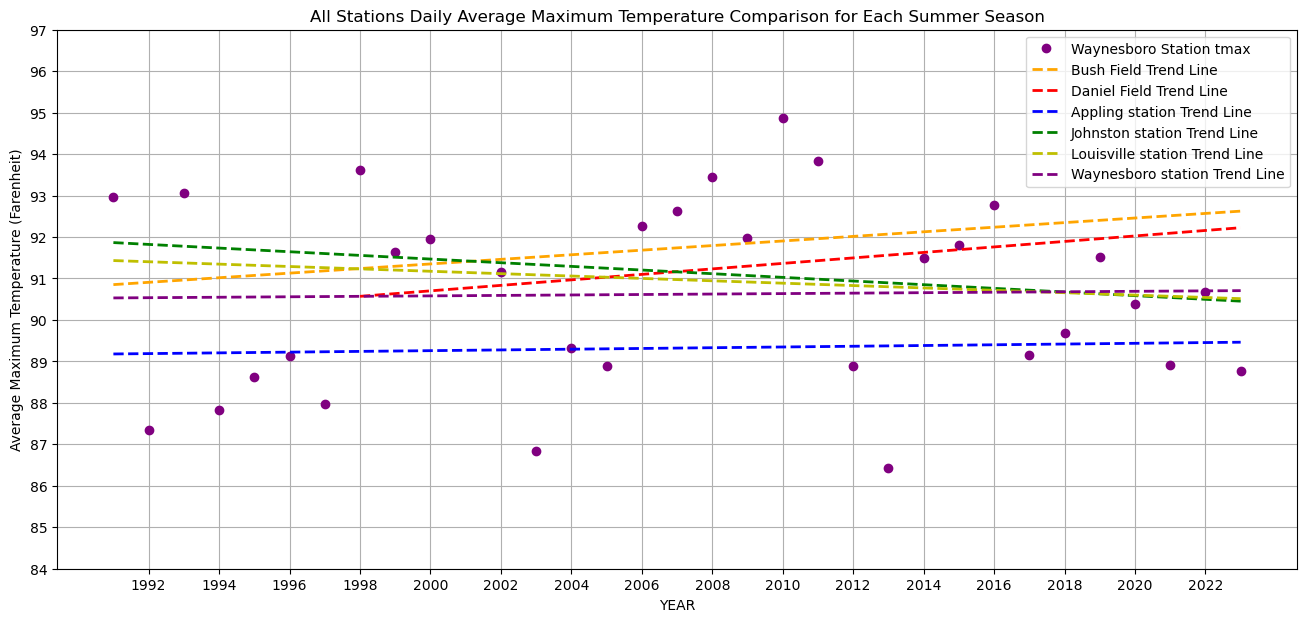

In [138]:
yearsB = seasonal_avg_tempB.index
temp_valuesB = seasonal_avg_tempB.values

yearsD = seasonal_avg_tempD.index
temp_valuesD = seasonal_avg_tempD.values

yearsA = seasonal_avg_tempA.index
temp_valuesA = seasonal_avg_tempA.values

yearsJ = seasonal_avg_tempJ.index
temp_valuesJ = seasonal_avg_tempJ.values

yearsL = seasonal_avg_tempL.index
temp_valuesL = seasonal_avg_tempL.values

yearsW = seasonal_avg_tempW.index
temp_valuesW = seasonal_avg_tempW.values

# Calculate the linear trend line
slopeB, interceptB = np.polyfit(yearsB, temp_valuesB, 1)
trend_lineB = slopeB * yearsB + interceptB

slopeD, interceptD = np.polyfit(yearsD, temp_valuesD, 1)
trend_lineD = slopeD * yearsD + interceptD

slopeA, interceptA = np.polyfit(yearsA, temp_valuesA, 1)
trend_lineA = slopeA * yearsA + interceptA

slopeJ, interceptJ = np.polyfit(yearsJ, temp_valuesJ, 1)
trend_lineJ = slopeJ * yearsJ + interceptJ

slopeL, interceptL = np.polyfit(yearsL, temp_valuesL, 1)
trend_lineL = slopeL * yearsL + interceptL

slopeW, interceptW = np.polyfit(yearsW, temp_valuesW, 1)
trend_lineW = slopeW * yearsW + interceptW

# Plotting
plt.figure(figsize=(16, 7))
plt.plot(yearsW, temp_valuesW, 'o', color='purple', label='Waynesboro Station tmax')
# Plotting trend line 
plt.plot(yearsB, trend_lineB, color='orange',linestyle='--',linewidth=2, label='Bush Field Trend Line')

plt.plot(yearsD, trend_lineD, 'r--',linewidth=2, label='Daniel Field Trend Line')

plt.plot(yearsA, trend_lineA, 'b--',linewidth=2, label='Appling station Trend Line')

plt.plot(yearsJ, trend_lineJ, 'g--',linewidth=2, label='Johnston station Trend Line')

plt.plot(yearsL, trend_lineL, 'y--',linewidth=2, label='Louisville station Trend Line')

plt.plot(yearsW, trend_lineW, color='purple',linewidth=2,linestyle='--', label='Waynesboro station Trend Line')

import scipy.stats as stats

from scipy.stats import t
def calculate_slope_and_error(x, y):
    # Perform linear regression
    slope, intercept = np.polyfit(x, y, 1)
    # Predict the values
    pred = np.polyval([slope, intercept], x)
    # Calculate the residuals
    residuals = y - pred
    # Standard error of the slope estimate
    N = len(x)
    SE = np.sqrt(np.sum(residuals**2) / (N - 2)) / np.sqrt(np.sum((x - np.mean(x)) ** 2))
    # Calculate the t-statistic for the slope
    t_statistic = slope / SE
    # Calculate the p-value assuming a two-tailed test
    df = N - 2  # degrees of freedom
    p_value = t.sf(np.abs(t_statistic), df) * 2
    return slope, SE, t_statistic, p_value

# slope and standard error calculation for each dataset
# Call the function and unpack all returned values
slopeB, SEB, t_statB, p_valueB = calculate_slope_and_error(yearsB, temp_valuesB)
print("Bush Field: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeB, SEB, t_statB, p_valueB))

slopeD, SED, t_statD, p_valueD = calculate_slope_and_error(yearsD, temp_valuesD)
print("Daniel Field: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeD, SED, t_statD, p_valueD))

slopeA, SEA, t_statA, p_valueA = calculate_slope_and_error(yearsA, temp_valuesA)
print("Appling Station: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeA, SEA, t_statA, p_valueA))

slopeJ, SEJ, t_statJ, p_valueJ = calculate_slope_and_error(yearsJ, temp_valuesJ)
print("Johnston Station: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeJ, SEJ, t_statJ, p_valueJ))

slopeL, SEL, t_statL, p_valueL = calculate_slope_and_error(yearsL, temp_valuesL)
print("Louisville Station: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeL, SEL, t_statL, p_valueL))

slopeW, SEW , t_statW, p_valueW= calculate_slope_and_error(yearsW, temp_valuesW)
print("Waynesboro Station: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeW, SEW,  t_statW, p_valueW))

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in yearsB if year % tick_interval == 0])
plt.yticks(np.arange(84, 98))

plt.title('All Stations Daily Average Maximum Temperature Comparison for Each Summer Season')
plt.xlabel('YEAR')
plt.ylabel('Average Maximum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
seasonal_avg_tempB = summer_Bdata.groupby('seasonal_year')['TMIN'].mean()
seasonal_avg_tempD = summer_Ddata.groupby('seasonal_year')['TMIN'].mean()
seasonal_avg_tempA = summer_Adata.groupby('seasonal_year')['TMIN'].mean()
seasonal_avg_tempJ = summer_Jdata.groupby('seasonal_year')['TMIN'].mean()
seasonal_avg_tempL = summer_Ldata.groupby('seasonal_year')['TMIN'].mean()
seasonal_avg_tempW = summer_Wdata.groupby('seasonal_year')['TMIN'].mean()

Bush Field: Slope = 0.05, Standard Error = 0.02,T-Stat = 2.28, p-value = 0.0297
Daniel Field: Slope = 0.09, Standard Error = 0.03,T-Stat = 3.56, p-value = 0.0016
Appling Station: Slope = 0.03, Standard Error = 0.03,T-Stat = 0.94, p-value = 0.3564
Johnston Station: Slope = 0.12, Standard Error = 0.04,T-Stat = 3.40, p-value = 0.0019
Louisville Station: Slope = -0.01, Standard Error = 0.02,T-Stat = -0.45, p-value = 0.6549
Waynesboro Station: Slope = 0.09, Standard Error = 0.03,T-Stat = 3.70, p-value = 0.0009


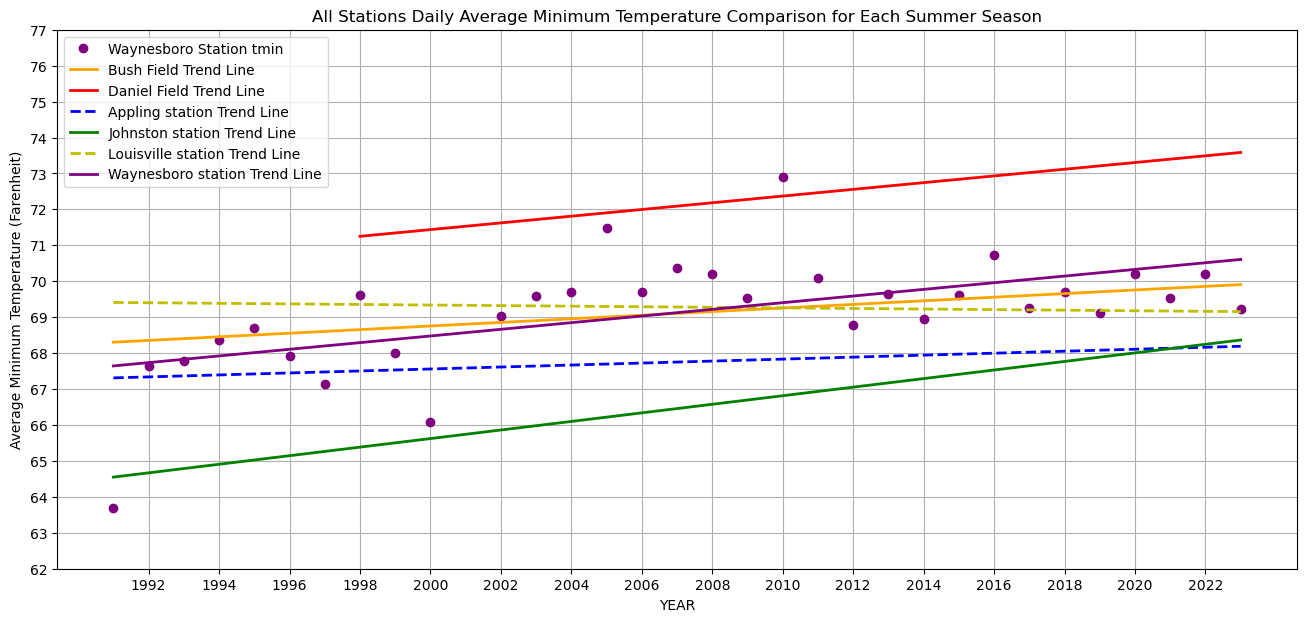

In [112]:
yearsB = seasonal_avg_tempB.index
temp_valuesB = seasonal_avg_tempB.values

yearsD = seasonal_avg_tempD.index
temp_valuesD = seasonal_avg_tempD.values

yearsA = seasonal_avg_tempA.index
temp_valuesA = seasonal_avg_tempA.values

yearsJ = seasonal_avg_tempJ.index
temp_valuesJ = seasonal_avg_tempJ.values

yearsL = seasonal_avg_tempL.index
temp_valuesL = seasonal_avg_tempL.values

yearsW = seasonal_avg_tempW.index
temp_valuesW = seasonal_avg_tempW.values

# Calculate the linear trend line
slopeB, interceptB = np.polyfit(yearsB, temp_valuesB, 1)
trend_lineB = slopeB * yearsB + interceptB

slopeD, interceptD = np.polyfit(yearsD, temp_valuesD, 1)
trend_lineD = slopeD * yearsD + interceptD

slopeA, interceptA = np.polyfit(yearsA, temp_valuesA, 1)
trend_lineA = slopeA * yearsA + interceptA

slopeJ, interceptJ = np.polyfit(yearsJ, temp_valuesJ, 1)
trend_lineJ = slopeJ * yearsJ + interceptJ

slopeL, interceptL = np.polyfit(yearsL, temp_valuesL, 1)
trend_lineL = slopeL * yearsL + interceptL

slopeW, interceptW = np.polyfit(yearsW, temp_valuesW, 1)
trend_lineW = slopeW * yearsW + interceptW

# Plotting
plt.figure(figsize=(16, 7))
plt.plot(yearsW, temp_valuesW, 'o', color='purple', label='Waynesboro Station tmin')
# Plotting trend line
plt.plot(yearsB, trend_lineB, color='orange',linestyle='-',linewidth=2, label='Bush Field Trend Line')

plt.plot(yearsD, trend_lineD, 'r-',linewidth=2, label='Daniel Field Trend Line')

plt.plot(yearsA, trend_lineA, 'b--',linewidth=2, label='Appling station Trend Line')

plt.plot(yearsJ, trend_lineJ, 'g-',linewidth=2, label='Johnston station Trend Line')

plt.plot(yearsL, trend_lineL, 'y--',linewidth=2, label='Louisville station Trend Line')

plt.plot(yearsW, trend_lineW, color='purple',linewidth=2, label='Waynesboro station Trend Line')

import scipy.stats as stats

from scipy.stats import t
def calculate_slope_and_error(x, y):
    # Perform linear regression
    slope, intercept = np.polyfit(x, y, 1)
    # Predict the values
    pred = np.polyval([slope, intercept], x)
    # Calculate the residuals
    residuals = y - pred
    # Standard error of the slope estimate
    N = len(x)
    SE = np.sqrt(np.sum(residuals**2) / (N - 2)) / np.sqrt(np.sum((x - np.mean(x)) ** 2))
    # Calculate the t-statistic for the slope
    t_statistic = slope / SE
    # Calculate the p-value assuming a two-tailed test
    df = N - 2  # degrees of freedom
    p_value = t.sf(np.abs(t_statistic), df) * 2
    return slope, SE, t_statistic, p_value

# slope and standard error calculation for each dataset
# Call the function and unpack all returned values
slopeB, SEB, t_statB, p_valueB = calculate_slope_and_error(yearsB, temp_valuesB)
print("Bush Field: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeB, SEB, t_statB, p_valueB))

slopeD, SED, t_statD, p_valueD = calculate_slope_and_error(yearsD, temp_valuesD)
print("Daniel Field: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeD, SED, t_statD, p_valueD))

slopeA, SEA, t_statA, p_valueA = calculate_slope_and_error(yearsA, temp_valuesA)
print("Appling Station: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeA, SEA, t_statA, p_valueA))

slopeJ, SEJ, t_statJ, p_valueJ = calculate_slope_and_error(yearsJ, temp_valuesJ)
print("Johnston Station: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeJ, SEJ, t_statJ, p_valueJ))

slopeL, SEL, t_statL, p_valueL = calculate_slope_and_error(yearsL, temp_valuesL)
print("Louisville Station: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeL, SEL, t_statL, p_valueL))

slopeW, SEW , t_statW, p_valueW= calculate_slope_and_error(yearsW, temp_valuesW)
print("Waynesboro Station: Slope = {:.2f}, Standard Error = {:.2f},T-Stat = {:.2f}, p-value = {:.4f}".format(slopeW, SEW,  t_statW, p_valueW))

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in yearsB if year % tick_interval == 0])
plt.yticks(np.arange(62, 78))

plt.title('All Stations Daily Average Minimum Temperature Comparison for Each Summer Season')
plt.xlabel('YEAR')
plt.ylabel('Average Minimum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()